<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=scipy.io.loadmat('/content/drive/MyDrive/data/ex4data1.mat')

In [3]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


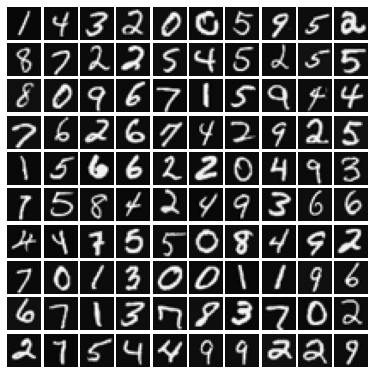

In [5]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
indexes = np.random.choice(5000, rows*cols)
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(data['X'][indexes[count]].reshape((20,20), order='F'), cmap='gray')
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

In [10]:
input_layer_size = 400# pic is 20*20
hidden_layer_size = 25 #second layer determined
num_labels = 10 #last layer 0-9

In [11]:
data_weights = scipy.io.loadmat('/content/drive/MyDrive/data/ex4weights.mat')
data_weights['Theta1'].shape, data_weights['Theta2'].shape

((25, 401), (10, 26))

In [12]:
#convert matrix to vector
nn_params = np.hstack((data_weights['Theta1'].ravel(order='F'), 
                       data_weights['Theta2'].ravel(order='F')))

In [13]:
import numpy as np
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

In [16]:
#cost function
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T))
        J = J + (j/m)
    return J

In [15]:
J = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, data['X'], data['y'])
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.287629)'.format(J))

Cost at parameters (loaded from ex4weights): [0.28762917] 
(this value should be about 0.287629)


In [17]:
#regularized cost function
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T)) ##sum of K
        J = J + (j/m) #sum of i
        
    sum1 = np.sum(np.sum(theta1[:, 1:] ** 2))
    sum2 = np.sum(np.sum(theta2[:, 1:] ** 2))
    J = J + (lambda_r / (2*m)) * (sum1 + sum2)
    return J

In [19]:
lambda_r = 1

J = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, data['X'], data['y'], lambda_r)
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.383770)'.format(J))

Cost at parameters (loaded from ex4weights): [0.38376986] 
(this value should be about 0.383770)


In [20]:
#backpropagattion

In [21]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1-sigmoid(z))

In [22]:
#random initialization
epsilon_init = 0.12
initial_theta1 = np.random.uniform(low=-epsilon_init, high=epsilon_init, size=(hidden_layer_size, input_layer_size+1))
initial_theta2 = np.random.uniform(low=-epsilon_init, high=epsilon_init, size=(num_labels, hidden_layer_size+1))

In [23]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    capital_delta1 = np.zeros(theta1.shape)
    capital_delta2 = np.zeros(theta2.shape)
    
    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T)) ##sum of K
        J = J + (j/m) #sum of i
        
        delta3 = a3 - yk.T
        
        z2 = np.hstack([1, z2])
        delta2 = theta2.T.dot(delta3.T) * (sigmoid_gradient(z2).reshape(-1,1))
        
        capital_delta1 = capital_delta1 + (delta2[1:,:].dot(a1.reshape(1,-1)))
        capital_delta2 = capital_delta2 + (delta3.T.dot(a2.reshape(1,-1)))
        
    sum1 = np.sum(np.sum(theta1[:, 1:] ** 2))
    sum2 = np.sum(np.sum(theta2[:, 1:] ** 2))
    J = J + (lambda_r / (2*m)) * (sum1 + sum2)
    
    theta1_grad = (1/m) * (capital_delta1 + lambda_r * theta1) #with regularization
    theta1_grad[:,0] = ((1/m) * capital_delta1)[:,0]
    
    theta2_grad = (1/m) * (capital_delta2 + lambda_r * theta2) #with regularization
    theta2_grad[:,0] = ((1/m) * capital_delta2)[:,0]
    
    grad = np.hstack((theta1_grad.ravel(order='F'), theta2_grad.ravel(order='F')))
    return J, grad



In [25]:
#Gradient Checking
def compute_numerical_gradient(theta, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    e = 0.0001
    num_grad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    for p in range(len(theta)):
        perturb[p] = e
        loss1, _ = nn_cost_function(theta-perturb, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
        loss2, _ = nn_cost_function(theta+perturb, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
        num_grad[p] = (loss2-loss1)/(2*e)
        perturb[p] = 0
    return num_grad

In [26]:
def debug_initialize_weights(fan_out, fan_in):
    W = np.zeros((fan_out, 1+fan_in))
    W = np.reshape(range(len(W.ravel(order='F'))), W.shape)/10
    return W

In [27]:
def check_nn_gradients(lambda_r=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    theta1 = debug_initialize_weights(hidden_layer_size, input_layer_size)
    theta2 = debug_initialize_weights(num_labels, hidden_layer_size)
    
    X = debug_initialize_weights(m, input_layer_size-1)
    y = 1 + np.mod(range(m), num_labels).reshape(-1, 1)
    
    nn_params = np.hstack((theta1.ravel(order='F'), theta2.ravel(order='F')))
    
    cost, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
    num_grad = compute_numerical_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
    
    print('The columns should be very similar...')
    for i, j in zip(num_grad, grad):
        print(i,j)
        
    diff = np.linalg.norm(num_grad-grad)/np.linalg.norm(num_grad+grad)
    if diff < 0.000000010:
        print('\nBackpropagation is correct')
    else:
        print('\nBackpropagation is incorrect')

In [28]:
check_nn_gradients()

The columns should be very similar...
0.3508102791105472 0.3508102782483561
0.2353522188158763 0.23535221882914456
0.1452979107607888 0.14529791114175525
0.09315199914539107 0.09315199923194291
0.06032069570061083 0.06032069599693199
0.1937398015439129 0.19373980185067552
0.08735383096869498 0.0873538307836033
0.029773973508895324 0.029773974437035562
0.010590364460938417 0.010590364574492521
0.004047666530837546 0.00404766588020231
0.2288208313494522 0.22882082967551112
0.11088905266909421 0.11088905266651777
0.04430376599806607 0.04430376555121108
0.019905564396793807 0.01990556449768681
0.010079735703882875 0.010079735479895512
0.26390185717595216 0.2639018575003467
0.1344242739431678 0.1344242745494322
0.058833556648707486 0.0588335566653866
0.029220764217186 0.029220764420881108
0.01611180537430812 0.01611180507958871
0.39622224609736634 0.3962222462654107
0.5887339968513317 0.588733996850061
0.7994663673738245 0.7994663670394307
0.24984228291557997 0.2498422829571028
0.3490656134

In [30]:
lambda_r = 3
check_nn_gradients(lambda_r)
J, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, data['X'], data['y'], lambda_r)
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.576051)'.format(J))

The columns should be very similar...
0.35081027911942897 0.3508102782483561
0.2353522188158763 0.23535221882914456
0.145297910751907 0.14529791114175525
0.09315199914539107 0.09315199923194291
0.06032069569172904 0.06032069599693199
0.2537398015434178 0.2537398018506755
0.38735383096621945 0.3873538307836033
0.5697739734955576 0.5697739744370356
0.7905903644456203 0.7905903645744927
1.0240476665224207 1.0240476658802022
0.348820831348462 0.34882082967551115
0.47088905267500536 0.47088905266651776
0.6443037660019968 0.6443037655512112
0.8599055643898623 0.8599055644976867
1.0900797357216163 1.0900797354798957
0.44390185717446684 0.4439018575003467
0.5544242739397021 0.5544242745494321
0.7188335566432613 0.7188335566653867
0.9292207642097594 0.9292207644208812
1.1561118053826647 1.1561118050795887
0.39622224608848455 0.3962222462654107
0.5887339968602134 0.588733996850061
0.7994663673827063 0.7994663670394307
0.30984228292396665 0.3098422829571028
0.7690656134862195 0.769065613486773
1.

In [32]:
#Training the Neural Network
import scipy.optimize as opt
lambda_r = 1
opt_results = opt.minimize(nn_cost_function, nn_params, args=(input_layer_size, 
                                                              hidden_layer_size, 
                                                              num_labels, 
                                                              data['X'], 
                                                              data['y'], 
                                                              lambda_r), 
                            method='L-BFGS-B', jac=True, options={'maxiter':50})

In [33]:
opt_results

      fun: array([0.31722116])
 hess_inv: <10285x10285 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.31088680e-04, -9.15347261e-05, -6.81873625e-05, ...,
       -4.79810736e-05, -2.89538852e-05,  2.21663569e-05])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 55
      nit: 50
   status: 1
  success: False
        x: array([-0.06388654, -0.13010792,  0.50133758, ..., -2.95836945,
       -2.87425683, -1.74870182])

In [34]:
theta1 = np.reshape(opt_results['x'][:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
theta2 = np.reshape(opt_results['x'][hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')

In [35]:
def predict_nn(theta1, theta2, X):
    m, n = X.shape
    a1 = np.hstack((np.ones((m,1)),X)) #with a0
    
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    
    z3 = np.hstack((np.ones((m,1)),a2)).dot(theta2.T) #with a0
    a3 = sigmoid(z3)
    h = np.argmax(a3, axis=1)+1 #get label with largest h(x)
    
    return h

In [38]:
y_pred = predict_nn(theta1, theta2, data['X'])
accuracy = np.mean(y_pred == data['y'].T)
f'Train accuracy: {accuracy * 100}'

'Train accuracy: 99.24'